In [11]:
import numpy as np

In [28]:
def softmax(S):
    expS = np.exp(S)
    return expS/expS.sum(axis=0)

In [140]:
def loss(WT, X, y):
    
    # forward pass for the loss itself

    S = WT @ X
    P = softmax(S)
    ypredicted = np.argmax(P,axis=0)
    Py = P[ y , np.arange(n) ] # need the yith row of each column i of P
    l = -np.log(Py)
    L = l.sum()

    # back-propagation of the gradient
    
    dLdl = np.ones_like( l )

    dLdP = np.zeros_like( P )
    dLdP[ y , np.arange(n) ] = -1/Py

    dLdS = np.zeros_like( S )
    for k in range( c ):
        dLdS += dLdP[k]*(-P[k]*P)
    dLdS += dLdP*P

    dLdWT = dLdS @ X.T
    
    return L, dLdWT, ypredicted  # loss itself and its gradient

In [47]:
from PIL import Image
import glob

In [48]:
def charclass(png):     # extract character class name from file name
        return png.split('__')[1][:-4]

In [127]:
from os.path import join
def loadimages(folder):
    pngs = sorted( glob.glob(join(folder, '*.png') ) )
    h,w = np.array(Image.open(pngs[0]))[:,:,0].shape #125,100
    selection = sorted( {charclass(png) for png in pngs} )

    # Load flattened images as columns of big array X
    X = np.empty((h*w,len(pngs)))
    for i,png in enumerate(pngs):
        X[:,i] = 255 - np.array(Image.open(png))[:,:,0].reshape(h*w)
    X /= X.sum()  # to avoid having huge numbers in our network

    # Get the true class numbers of all the images
    y = [selection.index(charclass(png)) for png in pngs]  # true classes of images
    return X,y, (h,w)

In [128]:
n = len(pngs)
c = len(selection)
hw = h*w

In [134]:
Xtrain,ytrain,(_,_) = loadimages('pngs')
Xtest,ytest,(_,_) = loadimages('testpngs')

/Users/austinmccarson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


AttributeError: 'bool' object has no attribute 'sum'

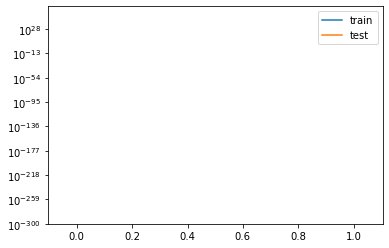

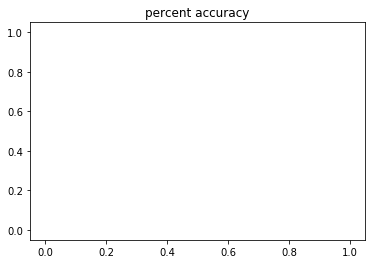

In [144]:
# Suppose we have no idea what the weights should be, and start at all zeros:
WT = np.zeros( (c, hw) ) 
Ltrain, Ltest, accuracylist = [],[],[]

# get loss and its gradient
L,gradL,ypredicted = loss( WT, X, y )

# change the weights by a multiple "stepsize" of the negative gradient
stepsize = 1 # 100   # 1
WT -= stepsize*gradL
L,gradL, ypredicted = loss( WT, X, y )

plt.figure()
npts = len(Ltrain)
plt.semilogy(range(npts), Ltrain, label='train')
plt.semilogy(range(npts), Ltest, label='test')
plt.legend()

plt.figure()
plt.plot( range(npts), accuracylist)
plt.title('percent accuracy')
#stepsize == learning rate
stepsize = 10000000
for it in range(1000):
    Llast = L
    WT -= stepsize*gradL
    L,_,ypredicted = loss( WT, X, y )
    accuracy = (ytest==ypredicted).sum()/len(ytest)
    accuracylist.append(accuracy)
    Ltrain.append(L)
    Ltest.append(Ltest)

plt.figure(figsize=10)
for j in range(c):
    plt.subplot(1,c,j+1)
    plt.imshow(WT[j].reshape(h,w), cmap='seismic')
    plt.axis('off')
    
print(L)

In [116]:
import matplotlib.pyplot as plt

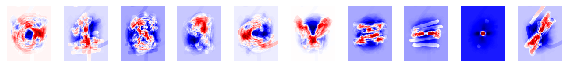

In [117]:
plt.figure(figsize=(10,1))
for j in range(c):
    plt.subplot(1,c,j+1)
    plt.imshow( WT[j].reshape(h,w), cmap='seismic' )
    plt.axis('off')

Add classification to the loss function

In [136]:
def loss(WT, X, y):
    
    # forward pass for the loss itself

    S = WT @ X
    P = softmax(S)
    ypredicted = np.argmax(P,axis=0)
    Py = P[ y , np.arange(n) ] # need the yith row of each column i of P
    l = -np.log(Py)
    L = l.sum()

    # back-propagation of the gradient
    
    dLdl = np.ones_like( l )

    dLdP = np.zeros_like( P )
    dLdP[ y , np.arange(n) ] = -1/Py

    dLdS = np.zeros_like( S )
    for k in range( c ):
        dLdS += dLdP[k]*(-P[k]*P)
    dLdS += dLdP*P

    dLdWT = dLdS @ X.T
    
    return L, dLdWT  # loss itself and its gradient

# With Tensorflow

In [148]:
import tensorflow
tensorflow.__version__

'1.12.0'

In [149]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense #fully connected layer

In [151]:
def preparedate( folder ):
    
    pngs = sorted( glob.glob(join(folder, '*.png') ) )
    h,w = np.array(Image.open(pngs[0]))[:,:,0].shape #125,100
    selection = sorted( {charclass(png) for png in pngs} )

    # Load flattened images as columns of big array X
    X = np.empty((h*w,len(pngs)))
    for i,png in enumerate(pngs):
        X[:,i] = 255 - np.array(Image.open(png))[:,:,0].reshape(h*w)
    X /= X.sum()  # to avoid having huge numbers in our network

    # Get the true class numbers of all the images
    y = [selection.index(charclass(png)) for png in pngs]  # true classes of images
    return X, y, (h,w)

In [ ]:
model = Sequential()
model.add( Dense( 10, input_dim=125*100, activation='softmax') ) # 10 is the number of nodes i.e. the number of outputs

from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate = 1 )
model.compile( optimizer=sgd, loss='categorical_crossentropy' )

#generate the 1-hot encoding of the label data
X, Y = preparedata( folder )

model.fit(X?, Y, verbose=2)